<a href="https://colab.research.google.com/github/mtofighi/RoadsideCollisions/blob/main/RoadCollision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Canada Roadside Collision Study**

> National Collision Database 1999 to 2017 <br>
> Source: https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a

>>https://opendatatc.blob.core.windows.net/opendatatc/NCDB_1999_to_2017.csv

> Let’s now take a look at our dataset attributes and understand their meaning and significance.

| Data element 	| Type 	| Code  | Definition 	|
|-----------------------	|-----------------------	|----------------------------	|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| C_YEAR 	| int64 	| 19yy-20yy  | Year of the collision 	|
| C_MNTH 	| int64 	| 01-12, UU, XX |Month of the collision  	|
| C_WDAY | int64 | 1-7, U, X | Weekday of the collision  	|
| C_HOUR | int64 | 00-23, UU, XX  |Hour of the collision  	|
| C_SEV | category | 1,2, U, X |  The collision severity <br> 1: Collision producing at least one fatality <br> 2: Collision producing non-fatal injury) |
| C_VEHS|int64 | 1-98,99, UU, XX | Number of vehicles involved in collision|
| C_CONF| category |01-06 , 21-25 , 31-36 , 41 , QQ, UU, XX |  Collision configuration|
| C_RCFG| category |01-12 , QQ, UU, XX |Roadway configuration|
| C_WTHR | category| 1-7 , Q , U , X|Weather condition|
| C_RSUR | category|1-9 , Q , U , X|Road surface|
| C_RALN | category| 1-6 , Q , U , X|Road alignment|
| C_TRAF | category| 01-18, UU, XX|Traffic control|
| V_ID | int64 | 1-98,99, UU|Vehicle sequence number|
| V_TYPE | category |00-23, NN, QQ, UU, XX|Vehicle type|
| V_YEAR | int64 | 19yy-20yy , NNNN , UUUU , XXXX|Vehicle model year|
| P_ID | int64 | 01 - 99 , NN , UU|Person sequence number|
| P_SEX | category | F , M , N , U , X|Person sex|
| P_AGE | int64 | 00 , 01 – 98 , 99 , NN , UU , XX|Person age|
| P_PSN | category |11-13 , 21-23 , 31-33 , 96-99 , NN, QQ, UU, XX|Person position|
| P_ISEV | category| 1-3 , N , U , X|Medical treatment required <br> 1: No Injury <br> 2: Injury  <br> 3: Fatality|
| P_SAFE | category |01 , 02 , 09-13 , NN, QQ, UU, XX|Safety device used|
| P_USER | category |1-5 , U|Road user class|
| C_CASE|int64 |  a number, starting from 752 |seems to be the index of data|


We have a total of 22 features and our objective is to predict the dependency of the sevirity of a collison (P_ISEV) to these features we will be building and interpreting a classification model.

## **0- Import or Install Libraries and General Settings**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for plot
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

!pip install auto-sklearn
import autosklearn
import autosklearn.classification
import sklearn.datasets
import sklearn.metrics
from autosklearn.metrics import balanced_accuracy, precision, recall, f1

## **1- Load Data**
Select One of the methods based on the work progress:

A- Data from Main Source [this URL](https://opendatatc.blob.core.windows.net/opendatatc/NCDB_1999_to_2017.csv) <br>


In [2]:
# A- Online Data (1999-2017)
!wget https://opendatatc.blob.core.windows.net/opendatatc/NCDB_1999_to_2017.csv
df_read = pd.read_csv("NCDB_1999_to_2017.csv")

--2021-10-18 20:14:45--  https://opendatatc.blob.core.windows.net/opendatatc/NCDB_1999_to_2017.csv
Resolving opendatatc.blob.core.windows.net (opendatatc.blob.core.windows.net)... 52.239.190.36
Connecting to opendatatc.blob.core.windows.net (opendatatc.blob.core.windows.net)|52.239.190.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 535032631 (510M) [application/vnd.ms-excel]
Saving to: ‘NCDB_1999_to_2017.csv’

NCDB_1999_to_2017.c 100%[===================>] 510.25M  12.9MB/s    in 31s     

2021-10-18 20:15:17 (16.3 MB/s) - ‘NCDB_1999_to_2017.csv’ saved [535032631/535032631]



### **1-1- Assign Loaded Data to Working with Dataframe**

In [3]:
df = df_read
df.info()
df.loc[1:2,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772563 entries, 0 to 6772562
Data columns (total 23 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
 22  C_CASE  int64 
dtypes: int64(3), object(20)
memory usage: 1.2+ GB


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
1,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,01,M,19,11,1,UU,1,752
2,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,02,F,20,13,2,02,2,752



### **1-2- Basic Feature Engineering**
> Here we convert the object type data columns to categorical or numericals based on the above table data and eliminate the uknown values.


In [4]:
%%time
print('-------------------------------------------------------------------------')
print('The number of rows for "df" DataFrame is               ', df['C_YEAR'].count())
from2013to2017 = df[ df.C_YEAR > 2012 ] # ############################################################# > 2012 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
print('The number of rows for "df" DataFrame is > 2012        ', from2013to2017['C_YEAR'].count())
print('-------------------------------------------------------------------------')
Only_two_vehic_untidy = df[df.C_CONF == '41']
print('The number of rows for "Only_two_vehic_untidy" DataFrame is         ', Only_two_vehic_untidy['C_YEAR'].count())
Only_two_vehic_untidy = from2013to2017[from2013to2017.C_CONF == '41']
print('The number of rows for "Only_two_vehic_untidy" DataFrame is (> 2012)', Only_two_vehic_untidy['C_YEAR'].count())
del Only_two_vehic_untidy
print('-------------------------------------------------------------------------')
## Cleaning and Controling data step by Step
#clean_mnth = df[ ( (df.C_MNTH != 'UU') & (df.C_MNTH != 'XX') ) ]                           # type int64 / month cleaned
clean_mnth = from2013to2017[ ( (from2013to2017.C_MNTH != 'UU') & (from2013to2017.C_MNTH != 'XX') ) ]         ####### > 2012 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
print('The number of rows for "df" DataFrame is > 2012        ', from2013to2017['C_YEAR'].count())
print('The number of rows for "clean_mnth" DataFrame is       ', clean_mnth['C_YEAR'].count())
clean_wday=clean_mnth[ ( (clean_mnth.C_WDAY != 'U') & (clean_mnth.C_WDAY != 'X') ) ]     # type int64 / weekday cleaned
del clean_mnth
print('The number of rows for "clean_wday" DataFrame is ', clean_wday['C_YEAR'].count())
clean_hour=clean_wday[ ( (clean_wday.C_HOUR != 'UU') & (clean_wday.C_HOUR != 'XX') ) ]   # type int64 / hour cleaned
del clean_wday
print('The number of rows for "clean_hour" DataFrame is ', clean_hour['C_YEAR'].count())
clean_vehs=clean_hour[ ( (clean_hour.C_VEHS != 'UU') & (clean_hour.C_VEHS != 'XX') ) ]   # type int64 / C_VEHS cleaned
del clean_hour
print('The number of rows for "clean_vehs" DataFrame is ', clean_vehs['C_YEAR'].count())
# ------------------------------------------------------------------------------------
# Only Hit a parked motor vehicle
# C_CONF type category
two_vehic_untidy = clean_vehs[clean_vehs.C_CONF == '41'] 
del clean_vehs
print('The number of rows for "two_vehic_untidy" DataFrame is  ', two_vehic_untidy['C_YEAR'].count())
# V_ID type int64
two_vehic_untidy_vid_cl = two_vehic_untidy[ ( (two_vehic_untidy.V_ID != 'UU') ) ]
del two_vehic_untidy
print('The number of rows for "two_vehic_untidy_vid_cl" DataFrame is  ', two_vehic_untidy_vid_cl['C_YEAR'].count()) 
# V_YEAR type int64
two_vehic_untidy_vye_cl = two_vehic_untidy_vid_cl[ ( ( (two_vehic_untidy_vid_cl.V_YEAR != 'UUUU') & (two_vehic_untidy_vid_cl.V_YEAR != 'XXXX') ) ) & (two_vehic_untidy_vid_cl.V_YEAR != 'NNNN')  ]
del two_vehic_untidy_vid_cl
print('The number of rows for "two_vehic_untidy_vye_cl" DataFrame is  ', two_vehic_untidy_vye_cl['C_YEAR'].count())
# P_ID type int64
two_vehic_untidy_pid_cl = two_vehic_untidy_vye_cl[ ( (two_vehic_untidy_vye_cl.P_ID != 'NN') & (two_vehic_untidy_vye_cl.P_ID != 'UU' ) ) ]
del two_vehic_untidy_vye_cl
print('The number of rows for "two_vehic_untidy_pid_cl" DataFrame is  ', two_vehic_untidy_pid_cl['C_YEAR'].count())
# P_SEX type category
two_vehic_untidy_sex_cl = two_vehic_untidy_pid_cl[ (  ( (two_vehic_untidy_pid_cl.P_SEX != 'U') & (two_vehic_untidy_pid_cl.P_SEX != 'X') ) ) & (two_vehic_untidy_pid_cl.P_SEX != 'N')  ]
del two_vehic_untidy_pid_cl
print('The number of rows for "two_vehic_untidy_sex_cl" DataFrame is  ', two_vehic_untidy_sex_cl['C_YEAR'].count())
# C_SEV type category
two_vehic_untidy_sev_cl = two_vehic_untidy_sex_cl[ ( (two_vehic_untidy_sex_cl.C_SEV != 'U') & (two_vehic_untidy_sex_cl.C_SEV != 'X') )  ] 
del two_vehic_untidy_sex_cl
print('The number of rows for "two_vehic_untidy_sev_cl" DataFrame is  ', two_vehic_untidy_sev_cl['C_YEAR'].count())
# C_RCFG type category
two_vehic_untidy_rcf_cl = two_vehic_untidy_sev_cl[ ( ( (two_vehic_untidy_sev_cl.C_RCFG != 'QQ') & (two_vehic_untidy_sev_cl.C_RCFG != 'UU') ) ) & (two_vehic_untidy_sev_cl.C_RCFG != 'XX')  ]
del two_vehic_untidy_sev_cl
print('The number of rows for "two_vehic_untidy_rcf_cl" DataFrame is  ', two_vehic_untidy_rcf_cl['C_YEAR'].count())
# C_WTHR type category
two_vehic_untidy_wth_cl = two_vehic_untidy_rcf_cl[ ( ( (two_vehic_untidy_rcf_cl.C_WTHR != 'Q') & (two_vehic_untidy_rcf_cl.C_WTHR != 'U') ) ) & (two_vehic_untidy_rcf_cl.C_WTHR != 'X')  ]
del two_vehic_untidy_rcf_cl
print('The number of rows for "two_vehic_untidy_wth_cl" DataFrame is  ', two_vehic_untidy_wth_cl['C_YEAR'].count())
# C_RSUR type category
two_vehic_untidy_rsu_cl = two_vehic_untidy_wth_cl[ ( ( (two_vehic_untidy_wth_cl.C_RSUR != 'Q') & (two_vehic_untidy_wth_cl.C_RSUR != 'U') ) ) & (two_vehic_untidy_wth_cl.C_RSUR != 'X')  ]
del two_vehic_untidy_wth_cl
print('The number of rows for "two_vehic_untidy_rsu_cl" DataFrame is  ', two_vehic_untidy_rsu_cl['C_YEAR'].count())
# C_RALN type category
two_vehic_untidy_ran_cl = two_vehic_untidy_rsu_cl[ ( ( (two_vehic_untidy_rsu_cl.C_RALN != 'Q') & (two_vehic_untidy_rsu_cl.C_RALN != 'U') ) ) & (two_vehic_untidy_rsu_cl.C_RALN != 'X')  ]
del two_vehic_untidy_rsu_cl
print('The number of rows for "two_vehic_untidy_ran_cl" DataFrame is  ', two_vehic_untidy_ran_cl['C_YEAR'].count())
# C_TRAF type category
two_vehic_untidy_tra_cl = two_vehic_untidy_ran_cl[ ( ( (two_vehic_untidy_ran_cl.C_TRAF != 'QQ') & (two_vehic_untidy_ran_cl.C_TRAF != 'UU') ) ) & (two_vehic_untidy_ran_cl.C_TRAF != 'XX')  ]
del two_vehic_untidy_ran_cl
print('The number of rows for "two_vehic_untidy_tra_cl" DataFrame is  ', two_vehic_untidy_tra_cl['C_YEAR'].count())
# V_TYPE type category
two_vehic_untidy_typ_cl = two_vehic_untidy_tra_cl[ ( ( (two_vehic_untidy_tra_cl.V_TYPE != 'NN') & (two_vehic_untidy_tra_cl.V_TYPE != 'QQ') ) ) & ( (two_vehic_untidy_tra_cl.V_TYPE != 'UU') & (two_vehic_untidy_tra_cl.V_TYPE != 'XX') )  ]
del two_vehic_untidy_tra_cl
print('The number of rows for "two_vehic_untidy_typ_cl" DataFrame is  ', two_vehic_untidy_typ_cl['C_YEAR'].count())
# P_AGE type int64
two_vehic_untidy_age_cl = two_vehic_untidy_typ_cl[ (  ( (two_vehic_untidy_typ_cl.P_AGE != 'UU') & (two_vehic_untidy_typ_cl.P_AGE != 'XX') ) ) & (two_vehic_untidy_typ_cl.P_AGE != 'NN')  ]
del two_vehic_untidy_typ_cl
print('The number of rows for "two_vehic_untidy_age_cl" DataFrame is  ', two_vehic_untidy_age_cl['C_YEAR'].count())
# P_PSN type category
two_vehic_untidy_psn_cl = two_vehic_untidy_age_cl[ ( ( (two_vehic_untidy_age_cl.P_PSN != 'NN') & (two_vehic_untidy_age_cl.P_PSN != 'QQ') ) ) & ( (two_vehic_untidy_age_cl.P_PSN != 'UU') & (two_vehic_untidy_age_cl.P_PSN != 'XX') )  ]
del two_vehic_untidy_age_cl
print('The number of rows for "two_vehic_untidy_psn_cl" DataFrame is  ', two_vehic_untidy_psn_cl['C_YEAR'].count())
# P_ISEV type category
two_vehic_untidy_ise_cl = two_vehic_untidy_psn_cl[ (  ( (two_vehic_untidy_psn_cl.P_ISEV != 'U') & (two_vehic_untidy_psn_cl.P_ISEV != 'X') ) ) & (two_vehic_untidy_psn_cl.P_ISEV != 'N')  ]
del two_vehic_untidy_psn_cl
print('The number of rows for "two_vehic_untidy_ise_cl" DataFrame is  ', two_vehic_untidy_ise_cl['C_YEAR'].count())
# P_SAFE type category
two_vehic_untidy_sav_cl = two_vehic_untidy_ise_cl[ (  ( (two_vehic_untidy_ise_cl.P_SAFE != 'UU') & (two_vehic_untidy_ise_cl.P_SAFE != 'XX') ) ) & ( (two_vehic_untidy_ise_cl.P_SAFE != 'QQ') & (two_vehic_untidy_ise_cl.P_SAFE != 'NN') ) ]
del two_vehic_untidy_ise_cl
print('The number of rows for "two_vehic_untidy_sav_cl" DataFrame is  ', two_vehic_untidy_sav_cl['C_YEAR'].count())
# P_USER type category
two_vehic_untidy_use_cl = two_vehic_untidy_sav_cl[ (two_vehic_untidy_sav_cl.P_USER != 'U') ]
del two_vehic_untidy_sav_cl
print('The number of rows for "two_vehic_untidy_use_cl" DataFrame is  ', two_vehic_untidy_use_cl['C_YEAR'].count())
# Cleaned data
two_vehic_df = two_vehic_untidy_use_cl
del two_vehic_untidy_use_cl
print('-------------------------------------------------------------------------')
print('The number of rows for "two_vehic_df" DataFrame is  ', two_vehic_df['C_YEAR'].count())
print('-------------------------------------------------------------------------')
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
print('-------------------------------------------------------------------------')
# Replace the "Sex" category by "Number" category to solve the error in next code
two_vehic_df = two_vehic_df.replace('M','0')
two_vehic_df = two_vehic_df.replace('F','1')

two_vehic_df[['C_YEAR','C_MNTH', 'C_WDAY' , 'C_HOUR', 'C_VEHS' , 'V_ID' , 'V_YEAR' , 'P_ID' , 'P_AGE','C_CASE']] = two_vehic_df[['C_YEAR','C_MNTH', 'C_WDAY' , 'C_HOUR', 'C_VEHS' , 'V_ID' , 'V_YEAR' , 'P_ID' , 'P_AGE','C_CASE']].apply(pd.to_numeric)
two_vehic_df[['C_SEV','C_CONF', 'C_RCFG' , 'C_WTHR', 'C_RSUR' , 'C_RALN' , 'C_TRAF' , 'V_TYPE' , 'P_SEX' , 'P_PSN' , 'P_ISEV' ,	'P_SAFE' ,	'P_USER' ]] = two_vehic_df[['C_SEV','C_CONF', 'C_RCFG' , 'C_WTHR', 'C_RSUR' , 'C_RALN' , 'C_TRAF' , 'V_TYPE' , 'P_SEX' , 'P_PSN' , 'P_ISEV' ,	'P_SAFE' ,	'P_USER' ]].astype('category')
two_vehic_df['V_AGE']=two_vehic_df['C_YEAR'] - two_vehic_df['V_YEAR'] + 1
number_of_data = two_vehic_df['C_YEAR'].count()
two_vehic_df.info()

-------------------------------------------------------------------------
The number of rows for "df" DataFrame is                6772563
The number of rows for "df" DataFrame is > 2012         1526265
-------------------------------------------------------------------------
The number of rows for "Only_two_vehic_untidy" DataFrame is          92856
The number of rows for "Only_two_vehic_untidy" DataFrame is (> 2012) 20156
-------------------------------------------------------------------------
The number of rows for "df" DataFrame is > 2012         1526265
The number of rows for "clean_mnth" DataFrame is        1526175
The number of rows for "clean_wday" DataFrame is  1526170
The number of rows for "clean_hour" DataFrame is  1514948
The number of rows for "clean_vehs" DataFrame is  1514930
The number of rows for "two_vehic_untidy" DataFrame is   19955
The number of rows for "two_vehic_untidy_vid_cl" DataFrame is   19955
The number of rows for "two_vehic_untidy_vye_cl" DataFrame is   1

#### **1-2-2- Dropping Unuseful Columns** _(Only for data loading methods A to D)_ 
 
> In _`[  'C_YEAR'  ,  'C_SEV'  ,  'C_CONF'  ,  'V_ID'  ,  'V_YEAR'  ,  'P_ID'  ,  'C_CASE'  ]`_ columns there are no information to help the predict. Therefore, we drop them. 

In [5]:
two_vehic_df = two_vehic_df.drop( ['C_YEAR','C_SEV','C_CONF','V_ID','V_YEAR','P_ID','C_CASE'], axis=1)
two_vehic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6399 entries, 5246480 to 6772040
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   C_MNTH  6399 non-null   int64   
 1   C_WDAY  6399 non-null   int64   
 2   C_HOUR  6399 non-null   int64   
 3   C_VEHS  6399 non-null   int64   
 4   C_RCFG  6399 non-null   category
 5   C_WTHR  6399 non-null   category
 6   C_RSUR  6399 non-null   category
 7   C_RALN  6399 non-null   category
 8   C_TRAF  6399 non-null   category
 9   V_TYPE  6399 non-null   category
 10  P_SEX   6399 non-null   category
 11  P_AGE   6399 non-null   int64   
 12  P_PSN   6399 non-null   category
 13  P_ISEV  6399 non-null   category
 14  P_SAFE  6399 non-null   category
 15  P_USER  6399 non-null   category
 16  V_AGE   6399 non-null   int64   
dtypes: category(11), int64(6)
memory usage: 422.1 KB


## **3- Methods of  `Decision Tree`, `Random Forest`, ` Logistic Regression`, `Naive Bayes`, `k-NN`**

### 3-1- **Data Engineering**

#### **3-1-1- Create dummy variables based on all variable**

In [6]:
# cat_cols=[['C_MNTH',	'C_WDAY',	'C_HOUR',	'C_VEHS',	'C_RCFG',	'C_WTHR',	'C_RSUR',	'C_RALN',	'C_TRAF',	'V_TYPE',	'P_SEX',	'P_AGE',	'P_PSN',	'P_ISEV',	'P_SAFE',	'P_USER',	'V_AGE']
two_vehic_df[['C_MNTH',	'C_WDAY',	'C_HOUR',	'C_VEHS',	'C_RCFG',	'C_WTHR',	'C_RSUR',	'C_RALN',	'C_TRAF',	'V_TYPE',	'P_SEX',	'P_AGE',	'P_PSN',	'P_ISEV',	'P_SAFE',	'P_USER',	'V_AGE']] = two_vehic_df[['C_MNTH',	'C_WDAY',	'C_HOUR',	'C_VEHS',	'C_RCFG',	'C_WTHR',	'C_RSUR',	'C_RALN',	'C_TRAF',	'V_TYPE',	'P_SEX',	'P_AGE',	'P_PSN',	'P_ISEV',	'P_SAFE',	'P_USER',	'V_AGE']].apply(pd.to_numeric)
two_vehic_df.info()
cat_cols =[]
two_vehic_df_cat = pd.get_dummies(two_vehic_df, columns=cat_cols, drop_first=True)
two_vehic_df_cat.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6399 entries, 5246480 to 6772040
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   C_MNTH  6399 non-null   int64
 1   C_WDAY  6399 non-null   int64
 2   C_HOUR  6399 non-null   int64
 3   C_VEHS  6399 non-null   int64
 4   C_RCFG  6399 non-null   int64
 5   C_WTHR  6399 non-null   int64
 6   C_RSUR  6399 non-null   int64
 7   C_RALN  6399 non-null   int64
 8   C_TRAF  6399 non-null   int64
 9   V_TYPE  6399 non-null   int64
 10  P_SEX   6399 non-null   int64
 11  P_AGE   6399 non-null   int64
 12  P_PSN   6399 non-null   int64
 13  P_ISEV  6399 non-null   int64
 14  P_SAFE  6399 non-null   int64
 15  P_USER  6399 non-null   int64
 16  V_AGE   6399 non-null   int64
dtypes: int64(17)
memory usage: 899.9 KB


,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,V_AGE
5246480,1,1,13,2,1,1,5,1,18,1,1,57,11,2,2,1,7
5246511,1,1,6,2,1,1,2,1,18,1,1,54,11,2,2,1,4



#### **3-1-2- Balancing the Dataset**
https://elitedatascience.com/imbalanced-classes

> Downsample majority class

In [7]:
two_vehic_df_cat_majority = two_vehic_df_cat[two_vehic_df_cat.P_ISEV==2]
two_vehic_df_cat_minority = two_vehic_df_cat[two_vehic_df_cat.P_ISEV==1]
print(two_vehic_df_cat_majority.shape[0])
print(two_vehic_df_cat_minority.shape[0])
from sklearn.utils import resample
# Downsample majority class
two_vehic_df_cat_majority_downsampled = resample(two_vehic_df_cat_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=two_vehic_df_cat_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results
two_vehic_df_cat_majority_downsampled.shape[0]

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([two_vehic_df_cat_majority_downsampled, two_vehic_df_cat_minority])
df_downsampled.P_ISEV.value_counts()

4721
1654


1    1654
2    1654
Name: P_ISEV, dtype: int64

#### **3-1-3- Partition into train and test**
Use train_test_split from sklearn.model_selection to partition the dataset into 70% for training and 30% for testing.

You can use the 70% for training set as both training and validation by using cross-validation.

**Train and Test the model**  
P_ISEV:<br>

|Code| Description|
|---------|-----------|
|1|No Injury|
|2|Injury|
|3|Fatality	Died immediately or within the time limit.

In [8]:
target = 'P_ISEV' # Collision producing at least one injury
features = list(df_downsampled.columns)
features = [f for f in features if f!=target]
# Separate input features (X) and target variable (y)
X = df_downsampled[features]
y = df_downsampled[[target]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(features)
print(X_train.shape)
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape)
# Make target variable in numpy array format of 0 or 1
y_train_b = 1*np.ravel(y_train)
y_test_b  = 1*np.ravel(y_test)

['C_MNTH', 'C_WDAY', 'C_HOUR', 'C_VEHS', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'P_SEX', 'P_AGE', 'P_PSN', 'P_SAFE', 'P_USER', 'V_AGE']
(2315, 16)
(2315, 1)
(993, 16)
(993, 1)


#### **3-1-4- Scaling Data**

In [9]:
from sklearn.preprocessing import MinMaxScaler
# For all datapoints
min_max_scaler_all = MinMaxScaler()
#---------------------------------|
X_minmax = min_max_scaler_all.fit_transform(X)
X_scaled = pd.DataFrame(X_minmax, columns = X.columns)
#---------------------------------
print(min_max_scaler_all.scale_)
#---------------------------------|
print(X_scaled.shape)
#---------------------------------
# Just based on the training set
min_max_scaler = MinMaxScaler()
#---------------------------------|
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(min_max_scaler.scale_)
X_tr_scaled = pd.DataFrame(X_train_minmax, columns = X_train.columns)

print(X_tr_scaled.shape)
#---------------------------------
# Just based on the test set
X_test_minmax = min_max_scaler.transform(X_test)
X_te_scaled = pd.DataFrame(X_test_minmax, columns = X_test.columns)
print(min_max_scaler.scale_)
#---------------------------------
print(y_train_b.shape)
print(X_tr_scaled.shape)

[0.09090909 0.16666667 0.04347826 0.07142857 0.125      0.16666667
 0.16666667 0.2        0.05882353 0.05       1.         0.01020408
 0.01162791 0.08333333 0.25       0.01923077]
(3308, 16)
[0.09090909 0.16666667 0.04347826 0.07142857 0.125      0.16666667
 0.2        0.2        0.05882353 0.05       1.         0.0106383
 0.01176471 0.08333333 0.25       0.01923077]
(2315, 16)
[0.09090909 0.16666667 0.04347826 0.07142857 0.125      0.16666667
 0.2        0.2        0.05882353 0.05       1.         0.0106383
 0.01176471 0.08333333 0.25       0.01923077]
(2315,)
(2315, 16)


### **3-2- Decision Tree**

#### **3-2-1- Cross Validation**


Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier.

**Use CV=10 in GridSearchDV**

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

params = {'criterion': ['gini','entropy'], 'max_leaf_nodes': [3,10,30,100,300,1000,3000], 'min_samples_split': [2, 10, 100], 
          'max_depth': [3,4, 5,6,7,8,10,12]}
dtree_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=10)
#---------------------------------|
dtree_cv.fit(X_tr_scaled, y_train_b)
#---------------------------------
print('dtree_cv.best_params are: ',dtree_cv.best_params_)
print('dtree_cv.best_score_ is: ',dtree_cv.best_score_) 

Fitting 10 folds for each of 336 candidates, totalling 3360 fits
dtree_cv.best_params are:  {'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_split': 100}
dtree_cv.best_score_ is:  0.6405844155844156


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'criterion': ['gini','entropy'], 'max_leaf_nodes': [3,10,30,100,300,1000,3000], 'min_samples_split': [2, 10, 100], 
          'max_depth': [3,4]}
dtree_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=10)
#---------------------------------|
dtree_cv.fit(X_tr_scaled, y_train_b)
#---------------------------------
print('dtree_cv.best_params are: ',dtree_cv.best_params_)
print('dtree_cv.best_score_ is: ',dtree_cv.best_score_)

Fitting 10 folds for each of 84 candidates, totalling 840 fits
dtree_cv.best_params are:  {'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_split': 2}
dtree_cv.best_score_ is:  0.623300119420809


#### **3-2-2- Measure the performance of your best model on the test set**
By measuring the best model performance on the test set, if it is close enough to the validation accuracy after cross-validation.

In [17]:
from sklearn.metrics import accuracy_score
y_pred = dtree_cv.predict(X_te_scaled)
accuracy_score(y_test_b, y_pred)

0.6465256797583081

#### **3-2-3- Visualizing the Tree**
Let's makes the best tree and visualize it based on the best parameters offered by cross validation {'max_depth': 5, 'max_leaf_nodes': 30, 'min_samples_split': 2}.

By visualizing this decision tree, we can see what the most important feature is

In [ ]:
criterion = dtree_cv.best_params_['criterion']
max_depth = dtree_cv.best_params_['max_depth']
max_leaf_nodes = dtree_cv.best_params_['max_leaf_nodes']
min_samples_split = dtree_cv.best_params_['min_samples_split']

dtree=DecisionTreeClassifier(class_weight=None,
                                              criterion=criterion,
                                              max_depth=max_depth,
                                              max_features=None,
                                              max_leaf_nodes=max_leaf_nodes,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=min_samples_split,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best')

dtree.fit(X, y)

feature_names = list(X.columns)
class_names = list(y.columns)

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
export_graphviz(dtree, out_file='tree.dot',  feature_names=feature_names,class_names=['1','2'],filled=True, rounded=True,special_characters=True)

y_pred = dtree.predict(X)
accuracy_score(y, y_pred)

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names,class_names=['1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('collision_decisiontree.png')
Image(graph.create_png())

### **3-3- Random Forest**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Choose some parameter combinations to try
params = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, scoring=acc_scorer, n_jobs=-1, verbose=1, cv=10)
#---------------------------------|
rf_grid_seaech = rf_cv.fit(X_tr_scaled,y_train_b)
#---------------------------------
# the best combination of parameters
print(f"rf_cv.best_params_:{rf_cv.best_params_}")

print( f"rf_cv.best_score_: {rf_cv.best_score_}")

# Test
#---------------------------------|
y_pred = rf_cv.predict(X_te_scaled)
accuracy_score(y_test_b, y_pred)
#---------------------------------
# Train the tuned RF on whole data
n_estimators = rf_cv.best_params_['n_estimators']
max_features = rf_cv.best_params_['max_features']
criterion = rf_cv.best_params_['criterion']
max_depth = rf_cv.best_params_['max_depth']
min_samples_leaf = rf_cv.best_params_['min_samples_leaf']
min_samples_split = rf_cv.best_params_['min_samples_split']

rf_tuned = RandomForestClassifier(random_state=42,
                                  n_estimators= n_estimators,
                                  criterion=criterion,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
#---------------------------------|
                                  min_samples_split=min_samples_split).fit(X_tr_scaled,y_train_b)
print(f"Accuracy of the tuned model: {accuracy_score(y_test_b, rf_tuned.predict(X_te_scaled))}")
#---------------------------------|

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
rf_cv.best_params_:{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 9}
rf_cv.best_score_: 0.6375858337065233
Accuracy of the tuned model: 0.6535750251762337


#### **3-3-1- Feature Importance**


P_AGE: 0.173
C_HOUR: 0.135
V_AGE: 0.13
C_MNTH: 0.107
C_WDAY: 0.0856
P_PSN: 0.0489
C_VEHS: 0.0462
C_WTHR: 0.0381
C_RSUR: 0.0357
V_TYPE: 0.0337
C_RALN: 0.0327
C_RCFG: 0.0292
P_SAFE: 0.028
C_TRAF: 0.027
P_SEX: 0.0251
P_USER: 0.0244


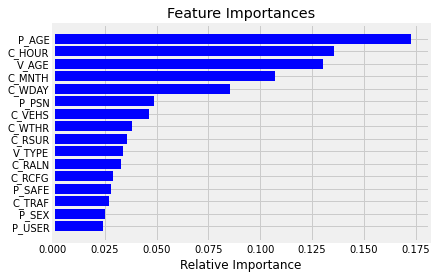

In [22]:
rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
#---------------------------------|
rnd_clf.fit(X_scaled, y)
features = X.columns
#---------------------------------
feature_importance = {}
#---------------------------------|
for name, importance in zip(X.columns, rnd_clf.feature_importances_):
#---------------------------------
  feature_importance[name] = importance
  
feature_importance = [(k, feature_importance[k]) for k in sorted(feature_importance, key=feature_importance.get, reverse=True)]
for k, v in feature_importance:
  print(f"{k}: {v:.3}")

importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### **3-4- Logistic Regression**

In [23]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

params={'solver':['lbfgs'], 'C':np.logspace(-3,3,7), 'penalty':['l2', 'none']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,params,n_jobs=-1, verbose=1, cv=10)
#---------------------------------|
logreg_cv.fit(X_tr_scaled,y_train)
#---------------------------------
print(f"Tuned hpyerparameters :(best parameters) {logreg_cv.best_params_}")
print(f"Accuracy of cross validation is {logreg_cv.best_score_}")
#---------------------------------|
print (f"Accuracy of test is {logreg_cv.score(X_te_scaled, y_test)}")
#---------------------------------
C = logreg_cv.best_params_['C']
penalty = logreg_cv.best_params_['penalty']
#---------------------------------|
logreg_tuned = LogisticRegression(random_state=42, solver='lbfgs',C=C, penalty=penalty ).fit(X_scaled, y)
print (f"Accuracy of tuned model is {logreg_cv.score(X_scaled, y)}")
#---------------------------------

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Tuned hpyerparameters :(best parameters) {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy of cross validation is 0.5908848335572474
Accuracy of test is 0.6022155085599195
Accuracy of tuned model is 0.6051995163240629


### **3-5- Naive Bayes**

In [24]:
from sklearn.naive_bayes import GaussianNB

params = {}
#---------------------------------|
nb_cv=GridSearchCV(GaussianNB(),params,n_jobs=-1, verbose=1, cv=5).fit(X_tr_scaled,y_train_b)
#---------------------------------
print(f"Accuracy of cross validation is {nb_cv.best_score_}")
#---------------------------------|
y_pred = nb_cv.predict(X_te_scaled)
accuracy_score(y_test_b, y_pred)
#---------------------------------

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy of cross validation is 0.5520518358531318


0.595166163141994

### **3-6- k-NN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
# we create a list
weight_options = ['uniform', 'distance']
# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)
#{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times
knn_cv = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
#---------------------------------|
knn_cv.fit(X_tr_scaled, y_train_b)
#---------------------------------
print(f"Tuned hpyerparameters :(best parameters) {knn_cv.best_params_}")
print(f"Accuracy of cross validation is {knn_cv.best_score_}")
#---------------------------------|
y_pred = knn_cv.predict(X_te_scaled)
print(accuracy_score(y_test_b, y_pred))
#---------------------------------

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
Tuned hpyerparameters :(best parameters) {'n_neighbors': 28, 'weights': 'distance'}
Accuracy of cross validation is 0.6012763098969997
0.62134944612286


## **3-7- Build and fit a classifier - Auto-Sklearn**

In [26]:
def error(solution, prediction):
    # custom function defining error
    return np.mean(solution != prediction)

def get_metric_result(cv_results):
    results = pd.DataFrame.from_dict(cv_results)
    results = results[results['status'] == "Success"]
    cols = ['rank_test_scores', 'param_classifier:__choice__', 'mean_test_score']
    cols.extend([key for key in cv_results.keys() if key.startswith('metric_')])
    return results[cols]

error_rate = autosklearn.metrics.make_scorer(
    name='custom_error',
    score_func=error,
    optimum=0,
    greater_is_better=False,
    needs_proba=False,
    needs_threshold=False
)
cls = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=86400,
    per_run_time_limit=300,
    scoring_functions=[balanced_accuracy, precision, recall, f1, error_rate]
)

cls.fit(X_tr_scaled,y_train_b, X_te_scaled, y_test_b)

predictions = cls.predict(X_te_scaled)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test_b, predictions))
print("#" * 80)
print("Metric results")
print(get_metric_result(cls.cv_results_).to_string(index=False))

Accuracy score 0.6565961732124874
################################################################################
Metric results
 rank_test_scores param_classifier:__choice__  mean_test_score  metric_balanced_accuracy  metric_precision  metric_recall  metric_f1  metric_custom_error
                2               random_forest         0.621728                  0.621225          0.612022       0.603774   0.607870             0.378272
                3                         lda         0.620419                  0.623348          0.588621       0.725067   0.649758             0.379581
                9                 gaussian_nb         0.566754                  0.564169          0.564103       0.474394   0.515373             0.433246
               11                 gaussian_nb         0.540576                  0.536536          0.536496       0.396226   0.455814             0.459424
                4                 extra_trees         0.617801                  0.617937          0.

## **3-10- Tree-based Pipeline Optimization Tool (TPOT)**

In [ ]:
!pip install tpot

# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)


# example of tpot for a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
# define dataset

#  X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
# model.fit(X, y)
model.fit(X_tr_scaled,y_train_b)
# export the best model
model.export('tpot_best_model.py')

## **4- Charts**

### **4-1- For Two Vehicle**

> This part has been generated for better presentatiom of outputs. <br>

In [ ]:
## Chart 1 - Hit a parked vehicle variation in different months
number_of_data = two_vehic_df['C_MNTH'].count()
print(number_of_data)
#months = ['January','February','March','April','May','June','July','August','September','October','November','December']
months = ['January (1)','February (2)','March (3)','April (4)','May (5)','June (6)','July (7)','August (8)','September (9)','October (10)','November (11)','December (12)']
months_count = two_vehic_df.groupby('C_MNTH').count().iloc[:, 1]
months_percent = months_count / number_of_data * 100
print(months_percent)
x_data = months
y1_data = months_percent
y2_data = months_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'monthely'
#------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()         # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show()
fig.savefig((filename+'.svg'), format='svg', dpi=300)
#-------------------------------------------------------------------------------------

In [ ]:
## Chart 2 - Hit a parked vehicle variation in different day of week
number_of_data = two_vehic_df['C_MNTH'].count()
#week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_day = ['Monday (1)','Tuesday (2)','Wednesday (3)','Thursday (4)','Friday (5)','Saturday (6)','Sunday (7)']
week_day_count = two_vehic_df.groupby('C_WDAY').count().iloc[:, 1]
week_day_percent = week_day_count / number_of_data * 100
print(week_day_percent)
x_data = week_day
y1_data = week_day_percent
y2_data = week_day_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'week_day'
#------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
#-------------------------------------------------------------------------------------
# print(week_day_count , week_day_count.sum())

In [ ]:
## Chart 3 - Hit a parked vehicle variation in different times of a day
number_of_data = two_vehic_df['C_MNTH'].count()
hour = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
hour_count = two_vehic_df.groupby('C_HOUR').count().iloc[:, 1]
hour_percent = hour_count / number_of_data * 100
print(hour_percent)
x_data = hour
x_lable = 'Hour'
y1_data = hour_percent
y2_data = hour_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'times_of_a_day'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 4 - Age of Vehicle in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_df['C_MNTH'].count()
veh_age_count = two_vehic_df.groupby('V_AGE').count().iloc[:, 1]
print(veh_age_count.index)
veh_age_percent = veh_age_count / number_of_data * 100
print(veh_age_percent)
x_data = veh_age_count.index
#print(veh_age_count.V_AGE, veh_age_count)
x_lable = 'Age of Vehicle'
y1_data = veh_age_percent
y2_data = veh_age_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'age_of_veh'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
plt.xlim(0,40)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 5 - Sex in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
driver_sex_count = two_vehic_df.groupby('P_SEX').count().iloc[:, 1]
driver_sex_percent = driver_sex_count / number_of_data * 100
# x_data = ['Male','Female'] #driver_sex_count.index
x_data = ['Male (1)','Female (2)'] #driver_sex_count.index
print(driver_sex_count)
print(driver_sex_percent)
x_lable = 'Person sex'
y1_data = driver_sex_percent
y2_data = driver_sex_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'Person_sex'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
#fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 6 - Person age in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
print(number_of_data)
person_age_count = two_vehic_df.groupby('P_AGE').count().iloc[:, 1]
print(person_age_count.index)
person_age_percent = person_age_count / number_of_data * 100
print(person_age_percent.head(40))
x_data = person_age_count.index
#print(veh_age_count.V_AGE, veh_age_count)
x_lable = 'Age of Person'
y1_data = person_age_percent
y2_data = person_age_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'age_of_person'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 7 - Driver age in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
#print(two_vehic_df[two_vehic_df['P_PSN'] == 11])
number_of_data = two_vehic_df[two_vehic_df['P_PSN'] == 11]['C_MNTH'].count()
print(number_of_data)
driver_age_count = two_vehic_df[two_vehic_df['P_PSN'] == 11].groupby('P_AGE').count().iloc[:, 1]
print(driver_age_count.index)
driver_age_percent = driver_age_count / number_of_data * 100
print(driver_age_percent.head(40))
x_data = driver_age_count.index
#print(veh_age_count.V_AGE, veh_age_count)
x_lable = 'Age of Driver'
y1_data = driver_age_percent
y2_data = driver_age_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'age_of_driver'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
## Chart 8 - Traffic control type in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
traffic_cont_count = two_vehic_df.groupby('C_TRAF').count().iloc[:, 1]
print(traffic_cont_count.index)
traffic_cont_percent = traffic_cont_count / number_of_data * 100
print(traffic_cont_percent)
# x_data = traffic_cont_count.index
# x_data =['Traffic signals fully operational',																
# 'Traffic signals in flashing mode',																
# 'Stop sign',																
# 'Yield sign',																
# 'Warning sign Yellow diamond shape sign',											
# 'Pedestrian crosswalk',																
# 'Police officer',																
# 'School guard, flagman',																
# 'School crossing',																
# 'Reduced speed zone',																
# 'No passing zone sign',																
# 'Markings on the road e.g. no passing',											
# 'School bus stopped with school bus signal lights flashing',																
# 'Railway crossing with signals, or signals and gates',																
# 'Railway crossing with signs only',																
# 'Control device not specified',																
# 'No control present']
# #
# x_data =['Traffic signals fully operational (01)',																
# 'Traffic signals in flashing mode (02)',																
# 'Stop sign (03)',																
# 'Yield sign (04)',																
# 'Warning sign (05)',											
# 'Pedestrian crosswalk (06)',																
# 'Police office (07)',																
# 'School guard, flagman (08)',																
# 'School crossing (09)',																
# 'Reduced speed zone (10)',																
# 'No passing zone sign (11)',																
# 'Markings on the road (12)',											
# 'School bus stopped with flashing signal (13)',																
# 'Railway crossing with signals, or signals and gates (15)',																
# 'Railway crossing with signs only (16)',																
# 'Control device not specified (17',																
# 'No control present (18)']
# #

x_data =['Traffic signals fully operational (01)',																
'Traffic signals in flashing mode (02)',																
'Stop sign (03)',																
'Yield sign (04)',																
'Warning sign (05)',											
'Pedestrian crosswalk (06)',																
'Police office (07)',																
'School guard, flagman (08)',																															
'Reduced speed zone (10)',																
'No passing zone sign (11)',																
'Markings on the road (12)',											
'School bus stopped with flashing signal (13)',																																
'Control device not specified (17',																
'No control present (18)']
x_lable = 'Traffic Control Type'
y1_data = traffic_cont_percent
y2_data = traffic_cont_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'traffic_cont'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 9 - Weather Conditions in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
weather_count = two_vehic_df.groupby('C_WTHR').count().iloc[:, 1]
print(weather_count.index)
weather_percent = weather_count / number_of_data * 100
print(weather_percent)
# x_data = weather_count.index
# x_data =['Clear and sunny',																	
# 'Overcast, cloudy but no precipitation',																	
# 'Raining',																	
# 'Snowing, not including drifting snow',																	
# 'Freezing rain, sleet, hail',																	
# 'Visibility limitation',																	
# 'Strong wind']
x_data =['Clear and sunny (1)',																	
'Overcast, cloudy but no precipitation (2)',																	
'Raining (3)',																	
'Snowing, not including drifting snow (4)',																	
'Freezing rain, sleet, hail (5)',																	
'Visibility limitation (6)',																	
'Strong wind (7)']
x_lable = 'Weather Condition'
y1_data = weather_percent
y2_data = weather_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'weather_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
## Chart 10 - Road surface  Condition in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
road_surf_count = two_vehic_df.groupby('C_RSUR').count().iloc[:, 1]
print(road_surf_count.index)
road_surf_percent = road_surf_count / number_of_data * 100
print(road_surf_percent.head(8))
# x_data = road_surf_count.index
# x_data =['Dry, normal','Wet','Snow (fresh, loose snow)','Slush, wet snow','Icy','Sand/gravel/dirt','Muddy','Oil']
#x_data =['Dry, normal (1)','Wet (2)','Snow (fresh, loose snow) (3)','Slush, wet snow (4)','Icy (5)','Sand/gravel/dirt (6)','Muddy (7)','Oil (8)']
x_data =['Dry, normal (1)','Wet (2)','Snow (fresh, loose snow) (3)','Slush, wet snow (4)','Icy (5)','Sand/gravel/dirt (6)','Muddy (7)']
x_lable = 'Road Surface'
y1_data = road_surf_percent
y2_data = road_surf_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'road_sur_conf'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
## Chart 11 - Road alignment in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
road_alig_count = two_vehic_df.groupby('C_RALN').count().iloc[:, 1]
print(road_alig_count.index)
road_alig_percent = road_alig_count / number_of_data * 100
print(road_alig_percent.head(6))
#x_data = road_alig_count.index
x_data =['Straight and level (1)','Straight with gradient (2)','Curved and level (3)','Curved with gradient (4)','Top of hill or gradient (5)','Bottom of hill or gradient (6)']
x_lable = 'Road Alignment'
y1_data = road_alig_percent
y2_data = road_alig_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'road_alignment_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
## Chart 12 - Road configuration in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
road_config_count = two_vehic_df.groupby('C_RCFG').count().iloc[:, 1]
print(road_config_count.index)
road_config_percent = road_config_count / number_of_data * 100
print(road_config_percent.head(10))
#x_data = road_config_count.index
# x_data =['Non-intersection',
# 'At an intersection of at least two public roadways',
# 'Intersection with parking lot, private driveway, ...',
# 'Railroad level crossing',
# 'Bridge, overpass, viaduct',
# 'Tunnel or underpass',
# 'Passing or climbing lane',
# 'Ramp',
# 'Traffic circle',
# 'Express lane of a freeway system']

# x_data =['Non-intersection (01)',
# 'At an intersection of at least two public roadways (02)',
# 'Intersection with parking lot, private driveway, ... (03)',
# 'Railroad level crossing (04)',
# 'Bridge, overpass, viaduct (05)',
# 'Tunnel or underpass (06)',
# 'Passing or climbing lane (07)',
# 'Ramp (08)',
# 'Traffic circle (09)',
# 'Express lane of a freeway system (10)']


x_data =['Non-intersection (01)',
'At an intersection of at least two public roadways (02)',
'Intersection with parking lot, private driveway, ... (03)',
'Railroad level crossing (04)',
'Bridge, overpass, viaduct (05)',
'Tunnel or underpass (06)',
'Passing or climbing lane (07)',
'Ramp (08)',
'Traffic circle (09)']
x_lable = 'Road Configuration'
y1_data = road_config_percent
y2_data = road_config_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'road_config_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
## Chart 13 - Person Position in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_df['C_MNTH'].count()
person_posi_count = two_vehic_df.groupby('P_PSN').count().iloc[:, 1]
print(person_posi_count.index)
person_posi_percent = person_posi_count / number_of_data * 100
print(person_posi_percent.head)
# x_data = person_posi_count.index
# x_data =['Driver',
# 'Front row, center',
# 'Front row, right outboard,...',
# 'Second row, left outboard,...',
# 'Second row, center',
# 'Second row, right outboard',
# 'Third row, left outboard',
# 'Third row, center',
# 'Third row, right outboard',
# 'Position unknown, but definitely an occupant',
# 'Sitting on someone’s lap',
# 'Outside passenger compartment',
# 'Pedestrian']

# x_data =['Driver (11)',
# 'Front row, center (12)',
# 'Front row, right outboard,... (13)',
# 'Second row, left outboard,... (21)',
# 'Second row, center (22)',
# 'Second row, right outboard (23)',
# 'Third row, left outboard (31)',
# 'Third row, center (32)',
# 'Third row, right outboard (33)',
# 'Position unknown, but definitely an occupant (96)',
# 'Sitting on someone’s lap (97)',
# 'Outside passenger compartment (98)']

x_data =['Driver (11)',
'Front row, center (12)',
'Front row, right outboard,... (13)',
'Second row, left outboard,... (21)',
'Second row, center (22)',
'Second row, right outboard (23)',
'Third row, left outboard (31)',
'Third row, center (32)',
'Third row, right outboard (33)',
'Position unknown, but definitely an occupant (96)',
'Sitting on someone’s lap (97)']
# ,'Pedestrian (99)']
x_lable = 'Person Position'
y1_data = person_posi_percent
y2_data = person_posi_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'person_pos_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
## Chart 14 - Person Position in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_df['C_MNTH'].count()
person_safe_count = two_vehic_df.groupby('P_SAFE').count().iloc[:, 1]
print(person_safe_count.index)
person_safe_percent = person_safe_count / number_of_data * 100
print(person_safe_percent.head)
# x_data = person_safe_count.index
# x_data =['No safety device used',
# 'Safety device used',
# 'Helmet worn',
# 'Other safety device used',
# 'No safety device equipped']
x_data =['No safety device used (01)',
'Safety device used (02)',
'Helmet worn (09)',
'Other safety device used (12)',
'No safety device equipped (13)']
x_lable = 'Person Safety'
y1_data = person_safe_percent
y2_data = person_safe_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'person_safe_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
## Chart 15 - Severity in hit a parked vehicle
number_of_data = two_vehic_df['C_MNTH'].count()
severity_count = two_vehic_df.groupby('P_ISEV').count().iloc[:, 1]
print(severity_count.index)
severity_percent = severity_count / number_of_data * 100
print(severity_count.head(3))
print(severity_percent.head(3))
# x_data = severity_count.index
# x_data =['No Injury',																	
# 'Injury',																	
# 'Fatality']
x_data =['No Injury (1)',																	
'Injury (2)',																	
'Fatality (3)']
x_lable = 'Medical treatment required'
y1_data = severity_percent
y2_data = severity_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'severity_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
import seaborn as sns  # for plot
sns.set(style="whitegrid")
sns.set_palette("husl",3)
fig, ax1 = plt.subplots()
fig.autofmt_xdate()
plt.xlabel(x_lable)
sns.barplot(x=x_data, y=y1_data)
plt.grid(False)
plt.ylabel(y1_lable)
ax2 = plt.twinx()
sns.barplot(x=x_data, y=y2_data, ax=ax2)
plt.grid(False)
plt.ylabel(y2_lable)
# plt.show() 
plt.savefig((filename+'1.svg'), format='svg', dpi=300, transparent=True)

In [ ]:
plt.style.use('fivethirtyeight')
%matplotlib inline

### **4-2- For All Data**

> This part has been generated for better presentatiom of outputs. <br>

In [ ]:
## Chart 1 - different months
number_of_data = cleaned_df['C_MNTH'].count()
print(number_of_data)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
months_count = cleaned_df.groupby('C_MNTH').count().iloc[:, 1]
months_percent = months_count / number_of_data * 100
x_data = months
y1_data = months_percent
y2_data = months_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'monthely'
#------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()         # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show()
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
#-------------------------------------------------------------------------------------

In [ ]:
## Chart 2 - different day of week
number_of_data = cleaned_df['C_MNTH'].count()
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_day_count = cleaned_df.groupby('C_WDAY').count().iloc[:, 1]
week_day_percent = week_day_count / number_of_data * 100
x_data = week_day
y1_data = week_day_percent
y2_data = week_day_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'week_day'
#------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
#-------------------------------------------------------------------------------------

In [ ]:
## Chart 3 - different times of a day
number_of_data = cleaned_df['C_MNTH'].count()
hour = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
hour_count = cleaned_df.groupby('C_HOUR').count().iloc[:, 1]
print(hour_count.head(2))
hour_percent = hour_count / number_of_data * 100
x_data = hour
x_lable = 'Hour'
y1_data = hour_percent
y2_data = hour_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'times_of_a_day'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 4 - Age of Vehicle 
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df['C_MNTH'].count()
veh_age_count = cleaned_df.groupby('V_AGE').count().iloc[:, 1]
print(veh_age_count.index)
veh_age_percent = veh_age_count / number_of_data * 100
print(veh_age_percent.head(2))
x_data = veh_age_count.index
x_lable = 'Age of Vehicle'
y1_data = veh_age_percent
y2_data = veh_age_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'age_of_veh'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
plt.xlim(0,40)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 5 - Sex
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df['C_MNTH'].count()
driver_sex_count = cleaned_df.groupby('P_SEX').count().iloc[:, 1]
driver_sex_percent = driver_sex_count / number_of_data * 100

x_data = ['Male','Female'] #driver_sex_count.index
print(driver_sex_count)
x_lable = 'Person sex'
y1_data = driver_sex_percent
y2_data = driver_sex_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'Person_sex'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g') #color='rgbkymc'
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 6 - Person age 
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df['C_MNTH'].count()
print(number_of_data)
person_age_count = cleaned_df.groupby('P_AGE').count().iloc[:, 1]
print(person_age_count.index)
person_age_percent = person_age_count / number_of_data * 100
print(person_age_percent.head(2))
x_data = person_age_count.index
#print(veh_age_count.V_AGE, veh_age_count)
x_lable = 'Age of Person'
y1_data = person_age_percent
y2_data = person_age_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'age_of_person'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 7 - Driver age
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df[cleaned_df['P_PSN'] == '11']['C_MNTH'].count()
print(number_of_data)
driver_age_count = cleaned_df[cleaned_df['P_PSN'] == '11'].groupby('P_AGE').count().iloc[:, 1]
print(driver_age_count.index)
driver_age_percent = driver_age_count / number_of_data * 100
print(driver_age_percent)
x_data = driver_age_count.index
#print(veh_age_count.V_AGE, veh_age_count)
x_lable = 'Age of Driver'
y1_data = driver_age_percent
y2_data = driver_age_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'age_of_driver'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y2_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)

In [ ]:
## Chart 8 - Traffic control type 
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df['C_MNTH'].count()
traffic_cont_count = cleaned_df.groupby('C_TRAF').count().iloc[:, 1]
print(traffic_cont_count.index)
traffic_cont_percent = traffic_cont_count / number_of_data * 100
print(traffic_cont_percent.head(2))
# x_data = traffic_cont_count.index
x_data =['Traffic signals fully operational',																
'Traffic signals in flashing mode',																
'Stop sign',																
'Yield sign',																
'Warning sign Yellow diamond shape sign',											
'Pedestrian crosswalk',																
'Police officer',																
'School guard, flagman',																
'School crossing',																
'Reduced speed zone',																
'No passing zone sign',																
'Markings on the road e.g. no passing',											
'School bus stopped with school bus signal lights flashing',																
'Railway crossing with signals, or signals and gates',																
'Railway crossing with signs only',																
'Control device not specified',																
'No control present']
x_lable = 'Traffic Control Type'
y1_data = traffic_cont_percent
y2_data = traffic_cont_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'traffic_cont'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 9 - Weather Condition
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df['C_MNTH'].count()
weather_count = cleaned_df.groupby('C_WTHR').count().iloc[:, 1]
print(weather_count.index)
weather_percent = weather_count / number_of_data * 100
print(weather_percent.head(2))
# x_data = weather_count.index
x_data =['Clear and sunny',																	
'Overcast, cloudy but no precipitation',																	
'Raining',																	
'Snowing, not including drifting snow',																	
'Freezing rain, sleet, hail',																	
'Visibility limitation  e.g. drifting snow, fog, smog, dust, smoke, mist',																	
'Strong wind',]
x_lable = 'Weather Condition'
y1_data = weather_percent
y2_data = weather_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'weather_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)

In [ ]:
## Chart 10 - Severity
number_of_data = cleaned_df['C_MNTH'].count()
severity_count_all = cleaned_df.groupby('P_ISEV').count().iloc[:, 1]
print(severity_count_all.index)
severity_percent_all = severity_count_all / number_of_data * 100
print(severity_count_all.head(3))
print(severity_percent_all.head(3))
# x_data = severity_count_all.index
x_data =['No Injury',																	
'Injury',																	
'Fatality']
x_lable = 'Medical treatment required'
y1_data = severity_percent_all
y2_data = severity_count_all
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'severity_cond'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
print(number_of_data)

In [ ]:
## Chart 10 - Severity compare
barWidth = 0.25

# x_data = severity_count.index
x_data =['No Injury',																	
'Injury',																	
'Fatality']
x_lable = 'Medical treatment required'
y1_data = severity_percent_all
y2_data = severity_percent
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'severity_cond_compare'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g', width = 0.1, label='National Collision')
ax2.bar(x_data, y2_data,color='b', width = 0.1, label='Hit a parked motor vehicle')
plt.grid(False)
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
# ax2.bar(x_data, y2_data,color='b')
# plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)

In [ ]:
## Chart 10 - Collision Configuration 
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = cleaned_df['C_MNTH'].count()
collision_conf_count = cleaned_df.groupby('C_CONF').count().iloc[:, 1]
print(collision_conf_count.index)
collision_conf_percent = collision_conf_count / number_of_data * 100
print(collision_conf_percent)
# x_data = collision_conf_count.index
x_data =['Hit a moving object',
'Hit a stationary object',
'Ran off left shoulder',
'Ran off right shoulder',
'Rollover on roadway',
'Any other single vehicle collision configuration',
'Rear-end collision',
'Side swipe',
'One vehicle passing to the left of the other or left turn conflict',
'One vehicle passing to the right of the other or right turn conflict',
'Any other two vehicle - same direction of travel configuration',
'Head-on collision',
'Approaching side-swipe',
'Left turn across opposing traffic',
'Right turn, including turning conflicts',
'Right angle collision',
'Any other two-vehicle - different direction of travel configuration',
'Hit a parked motor vehicle']
x_lable = 'Collision Configuration'
y1_data = collision_conf_percent
y2_data = collision_conf_count
y1_lable = 'National Collision (%)'
y2_lable = 'Number of National Collision'
filename = 'collision_configuration'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data,color='g')
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data,color='g')
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'_alldata.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
# collision_conf_count = cleaned_df.groupby('C_CONF').count().iloc[:, 1]
# print(collision_conf_count[collision_conf_count].sum())
# print('Number of data before 2017:   ',sum(df['C_YEAR'] < 2017))
print(collision_conf_percent[11])
print(collision_conf_percent[0:6].sum().round(1))
print(collision_conf_percent[6:11].sum().round(1))
print(collision_conf_percent[11:17].sum().round(1))
print(collision_conf_percent[17].round(1))
collision_conf_percent[0:17].round(1)

### **4-3- Other Presentoins**

> This part has been generated for better presentatiom of outputs. <br>

In [ ]:
ct= pd.crosstab(two_vehic_df.P_SEX,two_vehic_df.P_ISEV, margins=True)
ct.to_excel('ct_sex_sev.xlsx')
ct

In [ ]:
grouped_p_severity = two_vehic_df.groupby('P_ISEV').count().reset_index().iloc[:,[0,1]]
print(grouped_p_severity)
grouped_p_severity.to_excel('G_Sev.xlsx')

In [ ]:
table = pd.pivot_table(two_vehic_df, values=['V_AGE', 'P_AGE'], index=['C_WDAY', 'P_SEX'],
                       aggfunc={'V_AGE': [min, max, np.mean],'P_AGE': [min, max, np.mean]})
table.to_excel('pivot_table.xlsx')
table

In [ ]:
two_vehic_df.groupby('C_WDAY').count().iloc[:, 5]

## **5- Feature Importance for Controlable or Pridictable Data _(Can be Used to Inhance Radar Alarm Accuray_**

### **5-1- Dropping Uncontrolable or unpredictable Columns**
 
> In _`['C_RSUR',	'V_TYPE',	'P_SEX',	'P_AGE',	'P_PSN',	'P_USER',	'V_AGE']`_ columns there are no information that we can predict or control. Therefore, we drop them.

In [ ]:
un_cols=['C_RSUR','C_VEHS', 'V_TYPE',	'P_SEX',	'P_AGE',	'P_PSN',	'P_USER',	'V_AGE']
two_vehic_df_con = two_vehic_df.drop(un_cols, axis=1)
two_vehic_df_con.info()

### **5-2- Create dummy variables based on all variable**

In [ ]:
cat_cols =[]
two_vehic_df_con_cat = pd.get_dummies(two_vehic_df_con, columns=cat_cols, drop_first=True)
two_vehic_df_con_cat.head(2)

### **5-3- Balancing the Dataset**
https://elitedatascience.com/imbalanced-classes

> Downsample majority class

In [ ]:
two_vehic_df_con_cat_majority = two_vehic_df_con_cat[two_vehic_df_con_cat.P_ISEV==2]
two_vehic_df_con_cat_minority = two_vehic_df_con_cat[two_vehic_df_con_cat.P_ISEV==1]
print(two_vehic_df_con_cat_majority.shape[0])
print(two_vehic_df_con_cat_minority.shape[0])

from sklearn.utils import resample
# Downsample majority class
two_vehic_df_con_cat_majority_downsampled = resample(two_vehic_df_con_cat_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=two_vehic_df_cat_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results
two_vehic_df_con_cat_majority_downsampled.shape[0]

# Combine minority class with downsampled majority class
df_con_downsampled = pd.concat([two_vehic_df_con_cat_majority_downsampled, two_vehic_df_con_cat_minority])
df_con_downsampled.P_ISEV.value_counts()

### **5-4- Partition into train and test**
Use train_test_split from sklearn.model_selection to partition the dataset into 70% for training and 30% for testing.

You can use the 70% for training set as both training and validation by using cross-validation.

**Train and Test the model**  
P_ISEV:<br>

|Code| Description|
|---------|-----------|
|1|No Injury|
|2|Injury|
|3|Fatality	Died immediately or within the time limit.

In [ ]:
target = 'P_ISEV' # Collision producing at least one injury
features = list(df_con_downsampled.columns)
features = [f for f in features if f!=target]
# Separate input features (X) and target variable (y)
X = df_con_downsampled[features]
y = df_con_downsampled[[target]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(features)
print(X_train.shape)
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape)
# Make target variable in numpy array format of 0 or 1
y_train_b = 1*np.ravel(y_train)
y_test_b = 1*np.ravel(y_test)
y_train_b

print(X)

### **5-5- Scaling Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# For all datapoints
min_max_scaler_all = MinMaxScaler()
#---------------------------------|
X_minmax = min_max_scaler_all.fit_transform(X)
X_scaled = pd.DataFrame(X_minmax, columns = X.columns)
#---------------------------------
print(min_max_scaler_all.scale_)
#---------------------------------|
print(X_scaled.shape)
#---------------------------------
# Just based on the training set
min_max_scaler = MinMaxScaler()
#---------------------------------|
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(min_max_scaler.scale_)
X_tr_scaled = pd.DataFrame(X_train_minmax, columns = X_train.columns)

print(X_tr_scaled.shape)

X_test_minmax = min_max_scaler.transform(X_test)
X_te_scaled = pd.DataFrame(X_test_minmax, columns = X_test.columns)
#---------------------------------

### **5-6 Feature Importance**

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
#---------------------------------|
rnd_clf.fit( X,y)
features = X.columns
#---------------------------------
feature_importance = {}
#---------------------------------|
for name, importance in zip(X.columns, rnd_clf.feature_importances_):
#---------------------------------
  feature_importance[name] = importance
  
feature_importance = [(k, feature_importance[k]) for k in sorted(feature_importance, key=feature_importance.get, reverse=True)]
for k, v in feature_importance:
  print(f"{k}: {v:.3}")

importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
print('-------------------------------------------------------------------------')
two_vehic_fatality = two_vehic_df[two_vehic_df.P_ISEV == '3']
print('The number of rows for "two_vehic_fatality" DataFrame is ', two_vehic_fatality['C_MNTH'].count())
print('-------------------------------------------------------------------------')
two_vehic_fatality.info()

In [ ]:
## Chart 1 - Hit a parked vehicle variation in different months
number_of_data = two_vehic_fatality['C_MNTH'].count()
print(number_of_data)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
months_count = two_vehic_fatality.groupby('C_MNTH').count().iloc[:, 1]
months_percent = months_count / number_of_data * 100
x_data = months
y1_data = months_percent
y2_data = months_count
title = 'Fatality'
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'monthely_fatality'
#------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()         # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show()
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
## Chart 2 - Hit a parked vehicle variation in different day of week
number_of_data = two_vehic_fatality['C_MNTH'].count()
print(number_of_data)
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_day_count = two_vehic_fatality.groupby('C_WDAY').count().iloc[:, 1]
week_day_percent = week_day_count / number_of_data * 100
x_data = week_day
y1_data = week_day_percent
y2_data = week_day_count
title = 'Fatality'
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'weekday_fatality'
#------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
#-------------------------------------------------------------------------------------
# print(week_day_count , week_day_count.sum())

In [ ]:
## Chart 3 - Hit a parked vehicle variation in different times of a day
number_of_data = two_vehic_fatality['C_MNTH'].count()
print(number_of_data)
hour = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
hour_count = two_vehic_fatality.groupby('C_HOUR').count().iloc[:, 1]
print(hour_count.head(2))
hour_percent = hour_count / number_of_data * 100
x_data = hour
title = 'Fatality'
x_lable = 'Hour'
y1_data = hour_percent
y2_data = hour_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'times_of_a_day_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 4 - Age of Vehicle in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_fatality['C_MNTH'].count()
print(number_of_data)
veh_age_count = two_vehic_fatality.groupby('V_AGE').count().iloc[:, 1]
print(veh_age_count.index)
veh_age_percent = veh_age_count / number_of_data * 100
print(veh_age_percent.head(2))
x_data = veh_age_count.index
title = 'Fatality'
x_lable = 'Age of Vehicle'
y1_data = veh_age_percent
y2_data = veh_age_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'age_of_veh_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
## Chart 5 - Sex in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_fatality['C_MNTH'].count()
driver_sex_count = two_vehic_fatality.groupby('P_SEX').count().iloc[:, 1]
driver_sex_percent = driver_sex_count / number_of_data * 100

x_data = ['Male','Female'] #driver_sex_count.index
print(driver_sex_count)
title = 'Fatality'
x_lable = 'Driver sex'
y1_data = driver_sex_percent
y2_data = driver_sex_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'driver_sex_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
#fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 6 - Person age in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_fatality['C_MNTH'].count()
person_age_count = two_vehic_fatality.groupby('P_AGE').count().iloc[:, 1]
print(person_age_count.index)
person_age_percent = person_age_count / number_of_data * 100
print(person_age_percent.head(2))
x_data = person_age_count.index
title = 'Fatality'
x_lable = 'Age of Person'
y1_data = person_age_percent
y2_data = person_age_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'age_of_person_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
## Chart 7 - Driver age in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_fatality[two_vehic_fatality['P_PSN'] == '11']['C_MNTH'].count()
print(number_of_data)
driver_age_count = two_vehic_fatality[two_vehic_fatality['P_PSN'] == '11'].groupby('P_AGE').count().iloc[:, 1]
print(driver_age_count.index)
driver_age_percent = driver_age_count / number_of_data * 100
print(driver_age_percent.head(10))
x_data = driver_age_count.index
title = 'Fatality'
x_lable = 'Age of Driver'
y1_data = driver_age_percent
y2_data = driver_age_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'age_of_driver_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
## Chart 8 - Traffic control type in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_fatality['C_MNTH'].count()
traffic_cont_count = two_vehic_fatality.groupby('C_TRAF').count().iloc[:, 1]
print(traffic_cont_count.index)
traffic_cont_percent = traffic_cont_count / number_of_data * 100
print(traffic_cont_percent.head(2))
# x_data = traffic_cont_count.index
x_data =['Traffic signals fully operational',																
'Traffic signals in flashing mode',																
'Stop sign',																
'Yield sign',																
'Warning sign Yellow diamond shape sign',											
'Pedestrian crosswalk',																
'Police officer',																
'School guard, flagman',																
'School crossing',																
'Reduced speed zone',																
'No passing zone sign',																
'Markings on the road e.g. no passing',											
'School bus stopped with school bus signal lights flashing',																
'Railway crossing with signals, or signals and gates',																
'Railway crossing with signs only',																
'Control device not specified',																
'No control present']
title = 'Fatality'
x_lable = 'Traffic Control Type'
y1_data = traffic_cont_percent
y2_data = traffic_cont_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'traffic_cont_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)
##-------------------------------------------------------------------------------------

In [ ]:
## Chart 9 - Weather Condition in hit a parked vehicle
# C_YEAR	C_MNTH	C_WDAY	C_HOUR	C_SEV	C_VEHS	C_CONF	C_RCFG	C_WTHR	C_RSUR	C_RALN	C_TRAF	V_ID	V_TYPE	V_YEAR	P_ID	P_SEX	P_AGE	P_PSN	P_ISEV	P_SAFE	P_USER	C_CASE
number_of_data = two_vehic_fatality['C_MNTH'].count()
weather_count = two_vehic_fatality.groupby('C_WTHR').count().iloc[:, 1]
print(weather_count.index)
weather_percent = weather_count / number_of_data * 100
print(weather_percent.head(2))
# x_data = weather_count.index
x_data =['Clear and sunny',																	
'Overcast, cloudy but no precipitation',																	
'Raining',																	
'Snowing, not including drifting snow',																	
'Freezing rain, sleet, hail',																	
'Visibility limitation  e.g. drifting snow, fog, smog, dust, smoke, mist',																	
'Strong wind']
title = 'Fatality'
x_lable = 'Weather Condition'
y1_data = weather_percent
y2_data = weather_count
y1_lable = 'Hit a parked motor vehicle (%)'
y2_lable = 'Number of hits a parked vehicle'
filename = 'weather_cond_fatality'
##------------------------------------------------------------------------------------- 
fig, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(x_lable)
ax1.set_ylabel(y1_lable)
ax1.bar(x_data, y1_data)
plt.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(y2_lable)  # we already handled the x-label with ax1
ax2.bar(x_data, y2_data)
plt.grid(False)
fig.autofmt_xdate()
plt.show() 
fig.savefig((filename+'.svg'), format='svg', dpi=300)

In [ ]:
two_vehic_df = pd.read_csv("https://raw.githubusercontent.com/mtofighi/RoadCollisions/master/two_vehic_df.csv")
two_vehic_df=two_vehic_df.drop('Unnamed: 0', axis=1)
two_vehic_df.info()
two_vehic_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30255 entries, 0 to 30254
Data columns (total 17 columns):
C_MNTH    30255 non-null int64
C_WDAY    30255 non-null int64
C_HOUR    30255 non-null int64
C_VEHS    30255 non-null int64
C_RCFG    30255 non-null int64
C_WTHR    30255 non-null int64
C_RSUR    30255 non-null int64
C_RALN    30255 non-null int64
C_TRAF    30255 non-null int64
V_TYPE    30255 non-null int64
P_SEX     30255 non-null int64
P_AGE     30255 non-null int64
P_PSN     30255 non-null int64
P_ISEV    30255 non-null int64
P_SAFE    30255 non-null int64
P_USER    30255 non-null int64
V_AGE     30255 non-null int64
dtypes: int64(17)
memory usage: 3.9 MB


,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,V_AGE
0,1,1,0,2,1,1,5,1,18,1,0,25,11,2,2,1,6
1,1,1,18,2,1,1,3,3,18,1,0,34,11,2,2,1,12


In [ ]:
cat_cols = ['C_MNTH','C_WDAY', 'C_HOUR','C_RCFG' , 'C_WTHR', 'C_RSUR' , 'C_RALN' , 'C_TRAF' , 'V_TYPE' , 'P_SEX' , 'P_PSN'  ,	'P_SAFE' ,	'P_USER' ]
two_vehic_df_cat = pd.get_dummies(two_vehic_df, columns=[])
two_vehic_df_cat.head(2)

,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,V_AGE
0,1,1,0,2,1,1,5,1,18,1,0,25,11,2,2,1,6
1,1,1,18,2,1,1,3,3,18,1,0,34,11,2,2,1,12
